In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
# Clean data
bottom_percentile = df['value'].quantile(0.025)
top_percentile = df['value'].quantile(0.975)
df = df[df['value'] >= bottom_percentile]
df = df[df['value'] <= top_percentile]


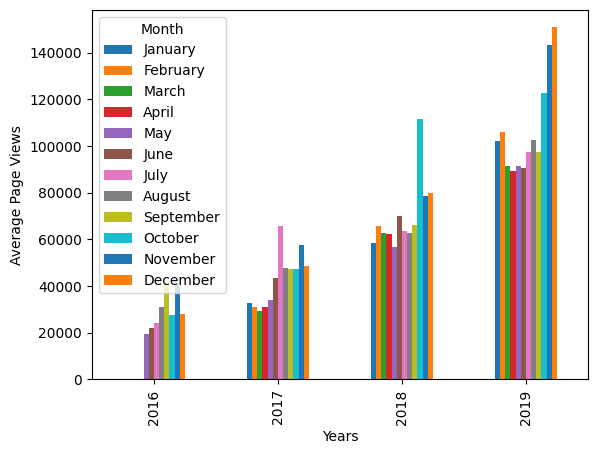

In [4]:
fig, ax = plt.subplots()

month_convert = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
# Copy and modify data for monthly bar plot
df_bar = df.groupby([df.index.year, df.index.month]).mean()
df_bar.rename_axis(index=["Year", "Month"], inplace=True)
df_bar = df_bar.reset_index()
df_bar = df_bar.pivot(index="Year", columns="Month", values="value")
df_bar.rename(columns=month_convert, inplace=True)

# Draw bar plot
df_bar.plot(ax=ax, kind="bar", xlabel="Years", ylabel="Average Page Views")
plt.tight_layout()
# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

In [44]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

,date,value,year,month
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec
1237,2019-12-03,158549,2019,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

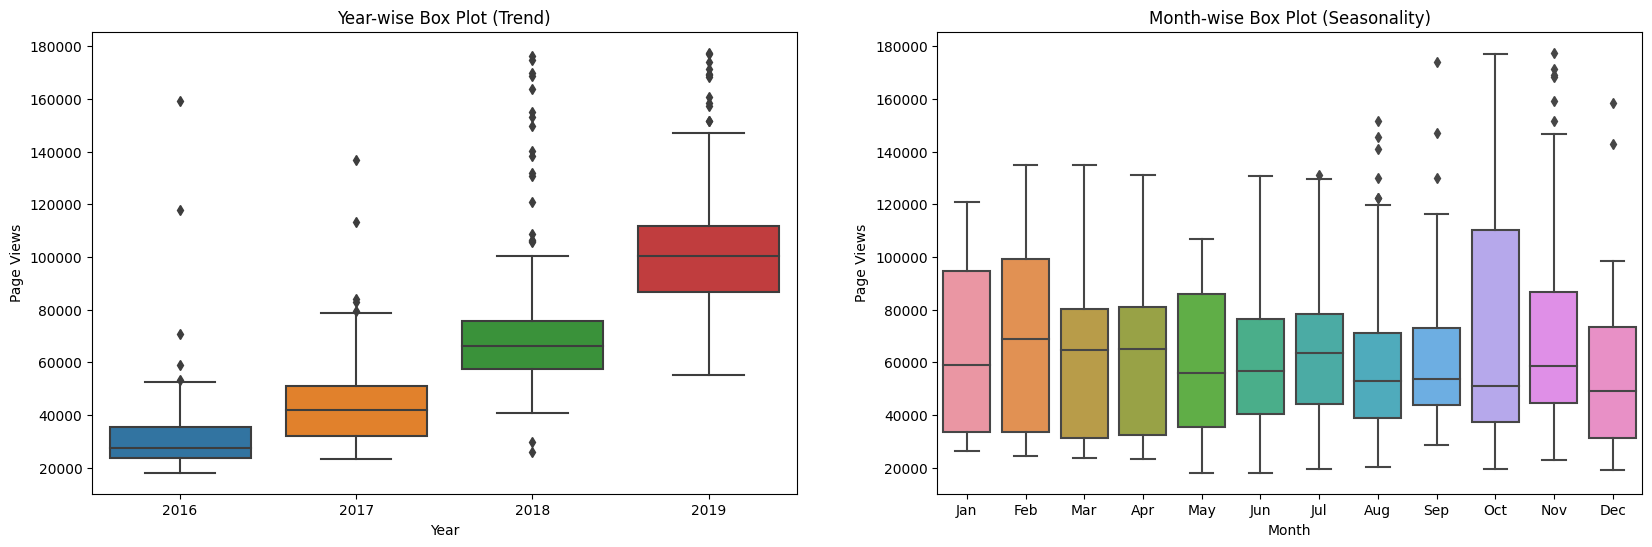

In [49]:
# Setting up figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30, 12))
fig.set_figwidth(20)
fig.set_figheight(6)

# Plotting Trend
sns.boxplot(data=df_box, ax=ax1, x='year', y='value')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title("Year-wise Box Plot (Trend)")
fig

# Plotting Seasonality
sns.boxplot(data=df_box, ax=ax2, x='month', y='value', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title("Month-wise Box Plot (Seasonality)")

